In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
red_wine = pd.read_csv('red-wine.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine.shape

(1599, 12)

In [4]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index) # creates the validation split by dropping the indices of df_train from red_wine,
# This ensures that the validation set does not contain the same rows as the training set.

df_train.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


In [5]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


In [6]:
print(X_train.shape,y_train.shape,X_valid.shape,y_valid.shape)

(1119, 11) (1119,) (480, 11) (480,)


Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.



In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512,activation='relu',input_shape = [11]),
    layers.Dense(512,activation='relu'),
    layers.Dense(512,activation='relu'),
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.



In [8]:
model.compile(
    optimizer='adam',
    loss='mae'
)

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) and to do that 10 times all the way through the dataset (the epochs).



In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 1s 57ms/step - loss: 0.2875 - val_loss: 0.1411
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1432 - val_loss: 0.1371
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1291 - val_loss: 0.1280
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1207 - val_loss: 0.1251
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.1141 - val_loss: 0.1068
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1123 - val_loss: 0.1081
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1086 - val_loss: 0.1041
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1067 - val_loss: 0.1037
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1062 - val_loss: 0.1063
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1045 - val_loss: 0.1008


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.



<Axes: >

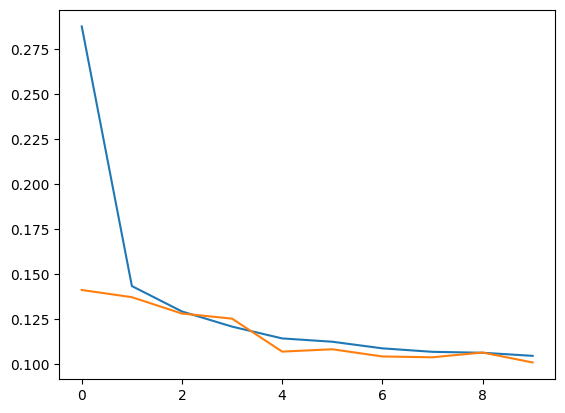

In [11]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['val_loss'].plot()

Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.